<a href="https://colab.research.google.com/github/AvelaAI/Myprofile/blob/main/Correlation_and_OLS_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

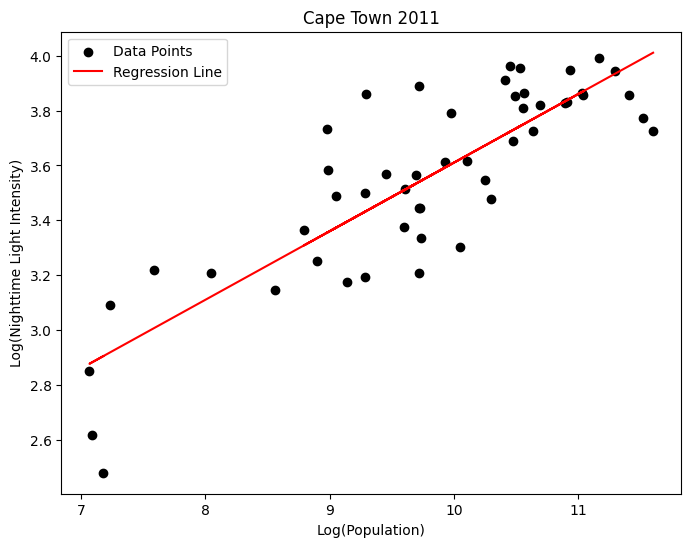


=== Correlation Analysis ===
Pearson Correlation Coefficient (r): 0.8449
P-value for Correlation: 0.00000
→ Statistically significant (p ≤ 0.05)

=== Regression Summary ===
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     119.7
Date:                Fri, 11 Apr 2025   Prob (F-statistic):           1.23e-14
Time:                        19:54:52   Log-Likelihood:                 13.427
No. Observations:                  50   AIC:                            -22.85
Df Residuals:                      48   BIC:                            -19.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err    

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.stats import pearsonr
import statsmodels.api as sm

# === Raw Data ===
population = np.array([
    237414, 67491, 56234, 112507, 56114, 106222, 92330, 44842, 1563, 11916,
    5595, 36043, 152030, 39237, 42479, 50, 11890, 12369, 50285, 16776,
    82199, 98468, 4, 17900, 15538, 391749, 2294, 16911, 154615, 46686,
    52401, 33225, 9048, 77121, 11586, 95630, 310485, 36857, 60528, 31980,
    57996, 119462, 1681, 570, 200603, 116, 1075, 6569, 4, 55166
])
nighttime_light = np.array([
    63, 14, 63, 63, 62, 63, 62, 62, 6, 63,
    6, 63, 63, 63, 63, 63, 31, 6, 63, 36,
    53, 63, 12, 21, 21, 48, 6, 31, 63, 63,
    63, 52, 52, 63, 16, 63, 63, 39, 62, 31,
    63, 63, 4, 6, 63, 54, 63, 6, 6, 12
])

# === Log-transform and Smooth ===
log_population = np.log1p(population)
log_ntl = np.log1p(nighttime_light)

smooth_population = gaussian_filter1d(log_population, sigma=2)
smooth_ntl = gaussian_filter1d(log_ntl, sigma=2)

# === OLS Regression ===
X = sm.add_constant(smooth_population)  # Adds intercept term
y = smooth_ntl
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# === Correlation Analysis ===
corr_coef, corr_p_value = pearsonr(smooth_population, smooth_ntl)

# === Residuals & Model Performance ===
residuals = y - predictions
rmse = np.sqrt(np.mean(residuals**2))
std_dev = np.std(y)
r2 = model.rsquared

# === Plot ===
plt.figure(figsize=(8,6))
plt.scatter(smooth_population, smooth_ntl, color='black', label='Data Points')
plt.plot(smooth_population, predictions, color='red', label='Regression Line')
plt.xlabel("Log(Population)")
plt.ylabel("Log(Nighttime Light Intensity)")
plt.title("Cape Town 2011")
plt.legend()
#plt.grid(True)
plt.show()

# === Print Results ===
print("\n=== Correlation Analysis ===")
print(f"Pearson Correlation Coefficient (r): {corr_coef:.4f}")
print(f"P-value for Correlation: {corr_p_value:.5f}")
if corr_p_value < 0.05:
    print("→ Statistically significant (p ≤ 0.05)")
else:
    print("→ Not statistically significant (p > 0.05)")

print("\n=== PolRegression Summary ===")
print(model.summary())

print("\n=== Additional Model Metrics ===")
print(f"Root Mean Square Error (RMSE): {rmse:.4f}")
print(f"Standard Deviation of Target: {std_dev:.4f}")
print(f"R² Score: {r2:.4f}")


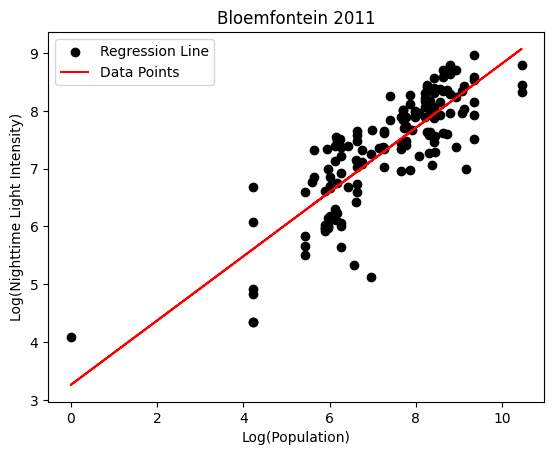


=== Correlation Analysis ===
Pearson Correlation Coefficient (r): 0.8335
P-value for Correlation: 0.0000
Result IS statistically significant (p ≤ 0.05)
Significance Level: 1% (strong evidence)

=== Regression Model Summary ===
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     339.0
Date:                Fri, 11 Apr 2025   Prob (F-statistic):           3.23e-40
Time:                        19:41:11   Log-Likelihood:                -122.59
No. Observations:                 151   AIC:                             249.2
Df Residuals:                     149   BIC:                             255.2
Df Model:                           1                                         
Covariance Type:            nonrobust                        

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from scipy.ndimage import gaussian_filter1d
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.stats import pearsonr
import statsmodels.api as sm

# Data
population_2011 = np.array([
    266, 11478, 763, 4491, 763, 384, 7578, 481, 3644, 6594, 5249, 377, 4075, 529, 5606,
    1067, 4644, 517, 4576, 8783, 2198, 1633, 2627, 34601, 458, 360, 67, 9605, 526, 2596,
    282, 2121, 2923, 11368, 280, 3177, 854, 2375, 2128, 717, 0, 1042, 407, 6129, 2263,
    1268, 1435, 521, 1393, 4313, 9076, 466, 2738, 4117, 3896, 615, 226, 226, 226, 226,
    11478, 11478, 11478, 763, 763, 7578, 7578, 5606, 5606, 5606, 2121, 2121, 854, 854,
    2375, 2375, 2375, 3644, 3644, 3644, 3644, 5249, 5249, 1435, 1435, 1435, 1435, 4491,
    4491, 4491, 4491, 4491, 736, 763, 763, 736, 384, 384, 384, 384, 481, 481, 4644, 1042,
    615, 8783, 2627, 2923, 2923, 2198, 2198, 6129, 6129, 1633, 9076, 3896, 3896, 4576,
    11368, 3177, 521, 4313, 466, 67, 67, 67, 67, 529, 529, 529, 67, 34601, 34601, 458,
    458, 360, 360, 360, 360, 4075, 4075, 4117, 4117, 407, 407, 407, 407, 6594, 6594,
    6594, 6594])  # (unchanged)
ntl_2011 = np.array([63, 63, 63, 3, 3, 63, 63, 63, 52, 61, 63, 63, 63, 3, 63, 63, 63, 63, 3, 62,
    54, 5, 62, 3, 3, 63, 55, 63, 3, 6, 6, 63, 62, 3, 63, 3, 63, 63, 3, 63, 63, 63,
    62, 54, 6, 6, 63, 3, 6, 3, 5, 3, 63, 63, 5, 63, 63, 63, 62, 63, 63, 63, 63, 62,
    63, 63, 58, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 43, 51, 58, 52, 63, 63, 63,
    63, 63, 63, 6, 10, 44, 36, 13, 3, 13, 16, 59, 63, 63, 63, 63, 63, 63, 63, 63,
    62, 62, 62, 62, 62, 62, 50, 62, 45, 25, 24, 3, 30, 49, 63, 32, 37, 15, 42, 51,
    56, 58, 62, 51, 52, 22, 10, 56, 49, 28, 7, 63, 63, 63, 63, 60, 61, 63, 63, 63,
    62, 62, 63, 62, 57, 61, 60])       # keep your existing ntl data

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.ndimage import gaussian_filter1d
import statsmodels.api as sm


# 1. Log Transformation
log_population = np.log(population_2011 + 1)
log_ntl = np.log(ntl_2011 + 1)

# 2. Smoothing (unchanged)
smoothed_ntl = gaussian_filter1d(log_population, sigma=1)

# 3. Regression using statsmodels
X = sm.add_constant(log_population)  # adds intercept term
y = smoothed_ntl

model = sm.OLS(y, X).fit()
predicted_ntl = model.predict(X)

# 4. Correlation coefficient (Pearson's r)
corr, p_value_corr = pearsonr(log_population, smoothed_ntl)

# 5. Residuals
residuals = y - predicted_ntl
std_dev_residuals = np.std(residuals)
rmse = np.sqrt(np.mean(residuals**2))
r2 = model.rsquared

# 6. Plot
plt.scatter(log_population, smoothed_ntl, color='black')
plt.plot(log_population, predicted_ntl, color='red')
plt.title('Bloemfontein 2011')
plt.xlabel('Log(Population)')
plt.ylabel('Log(Nighttime Light Intensity)')
plt.legend(["Data Points","Regression Line"])
plt.show()

# 7. Output
# Print results
print("\n=== Correlation Analysis ===")
print(f"Pearson Correlation Coefficient (r): {corr:.4f}")
print(f"P-value for Correlation: {p_value_corr:.4f}")

if p_value_corr > 0.05:
    print("Result is NOT statistically significant (p > 0.05)")
    if p_value_corr <= 0.1:
        print("Significance Level: 10% (weak evidence)")
    else:
        print("Significance Level: >10% (no significant evidence)")
else:
    print("Result IS statistically significant (p ≤ 0.05)")
    if p_value_corr <= 0.01:
        print("Significance Level: 1% (strong evidence)")
    else:
        print("Significance Level: 5% (moderate evidence)")

print("\n=== Regression Model Summary ===")
print(model.summary())

# Additional metrics
print("\n=== Model Performance Metrics ===")
print(f"Standard Deviation of Residuals: {std_dev_residuals:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")


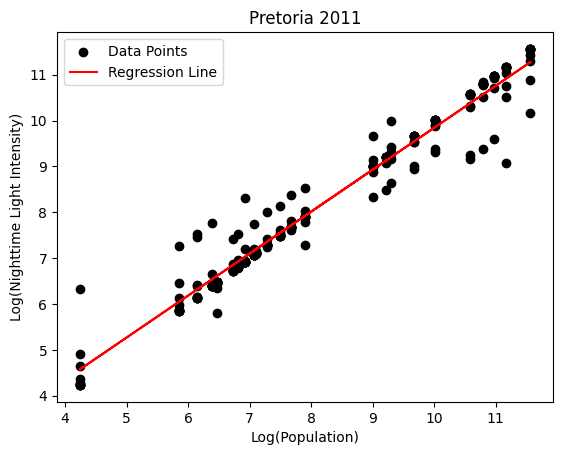


=== Correlation Analysis ===
Pearson Correlation Coefficient (r): 0.9789
P-value for Correlation: 0.0000
Result IS statistically significant (p ≤ 0.05)
Significance Level: 1% (strong evidence)

=== Regression Model Summary ===
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     5470.
Date:                Fri, 11 Apr 2025   Prob (F-statistic):          3.28e-166
Time:                        19:54:18   Log-Likelihood:                -102.04
No. Observations:                 240   AIC:                             208.1
Df Residuals:                     238   BIC:                             215.0
Df Model:                           1                                         
Covariance Type:            nonrobust                        

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from scipy.ndimage import gaussian_filter1d
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.stats import pearsonr
import statsmodels.api as sm

# Data
population_2011 = np.array([1015, 1015, 1015, 1015, 1015, 1015, 1015, 1015, 1015, 1015,
                           105208, 105208, 105208, 105208, 105208, 105208, 105208, 105208, 105208, 105208,
                           10964, 10964, 10964, 10964, 10964, 10964, 10964, 10964, 10964, 10964,
                           1167, 1167, 1167, 1167, 1167, 1167, 1167, 1167, 1167, 1167,
                           1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222,
                           1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
                           15760, 15760, 15760, 15760, 15760, 15760, 15760, 15760, 15760, 15760,
                           1788, 1788, 1788, 1788, 1788, 1788, 1788, 1788, 1788, 1788,
                           2157, 2157, 2157, 2157, 2157, 2157, 2157, 2157, 2157, 2157,
                           22434, 22434, 22434, 22434, 22434, 22434, 22434, 22434, 22434, 22434,
                           2702, 2702, 2702, 2702, 2702, 2702, 2702, 2702, 2702, 2702,
                           347, 347, 347, 347, 347, 347, 347, 347, 347, 347,
                           39201, 39201, 39201, 39201, 39201, 39201, 39201, 39201, 39201, 39201,
                           462, 462, 462, 462, 462, 462, 462, 462, 462, 462,
                           48493, 48493, 48493, 48493, 48493, 48493, 48493, 48493, 48493, 48493,
                           58431, 58431, 58431, 58431, 58431, 58431, 58431, 58431, 58431, 58431,
                           594, 594, 594, 594, 594, 594, 594, 594, 594, 594,
                           646, 646, 646, 646, 646, 646, 646, 646, 646, 646,
                           69, 69, 69, 69, 69, 69, 69, 69, 69, 69,
                           70863, 70863, 70863, 70863, 70863, 70863, 70863, 70863, 70863, 70863,
                           8166, 8166, 8166, 8166, 8166, 8166, 8166, 8166, 8166, 8166,
                           837, 837, 837, 837, 837, 837, 837, 837, 837, 837,
                           912, 912, 912, 912, 912, 912, 912, 912, 912, 912,
                           9972, 9972, 9972, 9972, 9972, 9972, 9972, 9972, 9972, 9972])

ntl_2011 = np.array([8, 8, 5, 5, 10, 10, 7, 7, 10, 10,
                     53, 53, 62, 62, 62, 62, 62, 62, 57, 57,
                     63, 63, 63, 63, 63, 63, 63, 63, 63, 63,
                     49, 49, 60, 60, 47, 47, 58, 58, 62, 62,
                     57, 57, 63, 63, 51, 51, 52, 52, 62, 62,
                     63, 63, 63, 63, 63, 63, 63, 63, 58, 58,
                     15, 15, 6, 6, 7, 7, 7, 7, 6, 6,
                     62, 62, 63, 63, 63, 63, 63, 63, 63, 63,
                     43, 43, 11, 11, 41, 41, 27, 27, 16, 16,
                     61, 61, 58, 58, 63, 63, 63, 63, 60, 60,
                     7, 7, 59, 59, 5, 5, 10, 10, 59, 59,
                     60, 60, 60, 60, 63, 63, 58, 58, 41, 41,
                     62, 62, 60, 60, 63, 63, 63, 63, 58, 58,
                     62, 62, 63, 63, 62, 62, 63, 63, 61, 61,
                     63, 63, 63, 63, 61, 61, 63, 63, 63, 63,
                     3, 3, 4, 4, 4, 4, 7, 7, 4, 4,
                     63, 63, 63, 63, 63, 63, 63, 63, 63, 63,
                     61, 61, 61, 61, 63, 63, 63, 63, 62, 62,
                     62, 62, 62, 62, 62, 62, 63, 63, 62, 62,
                     63, 63, 63, 63, 63, 63, 63, 63, 63, 63,
                     60, 60, 56, 56, 60, 60, 56, 56, 59, 59,
                     63, 63, 63, 63, 62, 62, 63, 63, 63, 63,
                     34, 34, 33, 33, 30, 30, 63, 63, 25, 25,
                     12, 12, 50, 50, 17, 17, 13, 13, 36, 36,
                     ])

# 1. Log Transformation
log_population = np.log(population_2011)
log_ntl = np.log(ntl_2011)

# 2. Smoothing with Gaussian Filter
smoothed_ntl = gaussian_filter1d(log_population, sigma=1)

# 3. Add constant term for intercept
X = sm.add_constant(log_population)  # Adds intercept term to the model
y = smoothed_ntl

# 4. Fit model using statsmodels
model = sm.OLS(y, X).fit()

# 5. Predictions
predictions = model.predict(X)

# 6. Correlation coefficient (Pearson's r)
corr, p_value_corr = pearsonr(log_population, smoothed_ntl)

# 7. Residual analysis
residuals = y - predictions
std_dev_residuals = np.std(residuals)
rmse = np.sqrt(np.mean(residuals**2))
r2 = model.rsquared

# Plot
plt.scatter(log_population, smoothed_ntl, color='black')
plt.plot(log_population, predictions, color='red')
plt.title('Pretoria 2011')
plt.xlabel('Log(Population)')
plt.ylabel('Log(Nighttime Light Intensity)')
plt.legend(['Data Points','Regression Line'])
plt.show()

# Print results
print("\n=== Correlation Analysis ===")
print(f"Pearson Correlation Coefficient (r): {corr:.4f}")
print(f"P-value for Correlation: {p_value_corr:.4f}")

if p_value_corr > 0.05:
    print("Result is NOT statistically significant (p > 0.05)")
    if p_value_corr <= 0.1:
        print("Significance Level: 10% (weak evidence)")
    else:
        print("Significance Level: >10% (no significant evidence)")
else:
    print("Result IS statistically significant (p ≤ 0.05)")
    if p_value_corr <= 0.01:
        print("Significance Level: 1% (strong evidence)")
    else:
        print("Significance Level: 5% (moderate evidence)")

print("\n=== Regression Model Summary ===")
print(model.summary())

# Additional metrics
print("\n=== Model Performance Metrics ===")
print(f"Standard Deviation of Residuals: {std_dev_residuals:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")
